In [52]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

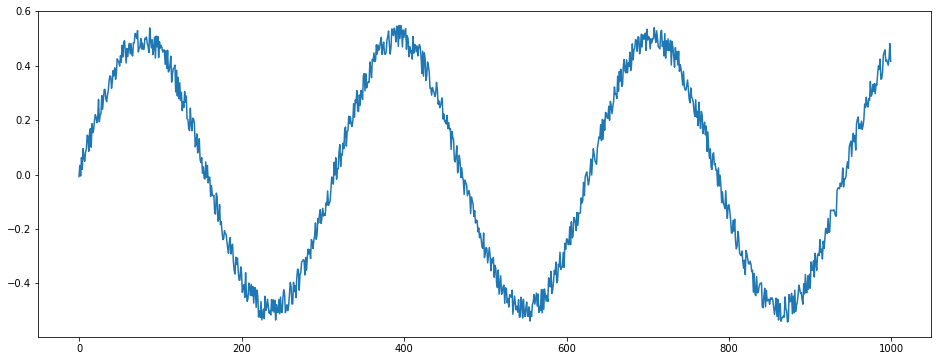

In [73]:
N = 1000 
t = np.arange(0, N)
data_sine = np.sin(0.02 * t)/2 + np.random.uniform(-0.05, 0.05, N) #عمدا نویز دادم که شبکه توی شرایط نویزی هم اوکی باشه
plt.figure(figsize=(16, 6))
plt.plot(data_sine)

In [74]:
def conver_to_dataset(signal, step):
  X = []
  Y = []
  for i in range(len(signal) - step):
    j = i + step
    X.append(signal[i:j])
    Y.append(j)
  return np.array(X), np.array(Y)

In [75]:
X_sine, Y_sine = conver_to_dataset(data_sine, 40) # شبکه ۴۰ تا رو می بینه بعد اظهار نظر می کنه

In [76]:
Y_sine.shape

(960,)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sine, Y_sine, test_size=0.2)

In [78]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [79]:
model = tf.keras.models.Sequential([
                                    layers.SimpleRNN(units=64, input_shape=(None, 1)),
                                    layers.Dense(1)
])

In [80]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MAE
)

In [81]:
model.fit(X_train, Y_train, epochs=100, batch_size=16)

Epoch 1/100
48/48 [==============================] - 3s 43ms/step - loss: 520.9820
Epoch 2/100
48/48 [==============================] - 2s 31ms/step - loss: 515.4641
Epoch 3/100
48/48 [==============================] - 1s 31ms/step - loss: 511.5710
Epoch 4/100
48/48 [==============================] - 1s 31ms/step - loss: 507.4098
Epoch 5/100
48/48 [==============================] - 1s 31ms/step - loss: 504.5791
Epoch 6/100
48/48 [==============================] - 1s 31ms/step - loss: 500.3432
Epoch 7/100
48/48 [==============================] - 2s 32ms/step - loss: 496.4207
Epoch 8/100
48/48 [==============================] - 1s 31ms/step - loss: 496.0636
Epoch 9/100
48/48 [==============================] - 2s 32ms/step - loss: 492.0453
Epoch 10/100
48/48 [==============================] - 2s 33ms/step - loss: 486.5619
Epoch 11/100
48/48 [==============================] - 3s 53ms/step - loss: 482.9753
Epoch 12/100
48/48 [==============================] - 2s 51ms/step - loss: 479.5138
E

In [82]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 7ms/step - loss: 282.5413


282.54132080078125

In [83]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [84]:
train_pred.shape, test_pred.shape

(768, 1)

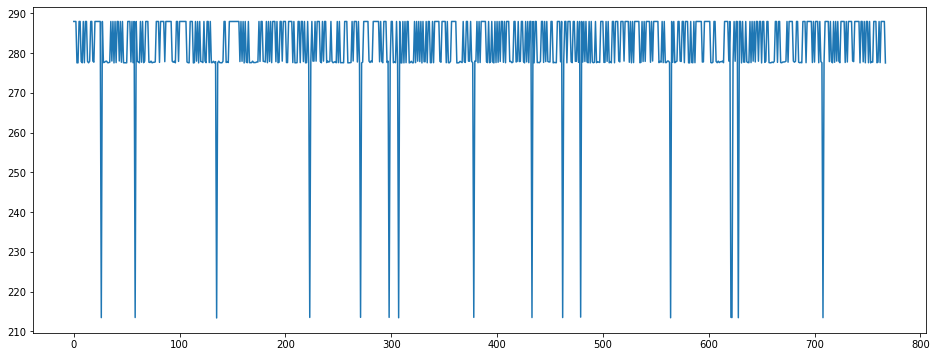

In [85]:
plt.figure(figsize=(16, 6))
plt.plot(train_pred)

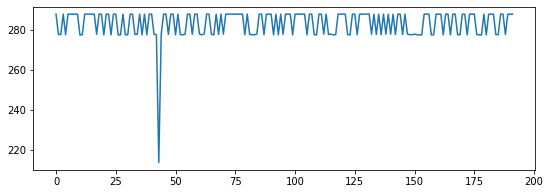

In [86]:
plt.figure(figsize=(9, 3))
plt.plot(test_pred)